In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import spacy

from wordcloud import WordCloud


In [2]:
data = pd.read_csv('IMDB Dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
review       50000 non-null object
sentiment    50000 non-null object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Exploratory Data Analysis

In [5]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [6]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
data['sentiment'] = np.where(data['sentiment'] == 'negative', 0, 1)

[[Text(0, 0, 'negative'), Text(0, 0, 'positive')]]

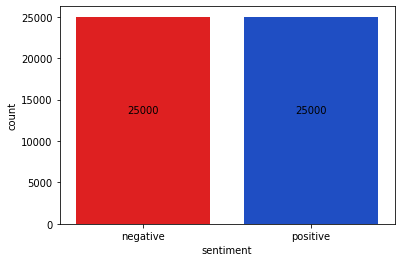

In [8]:
ax = sns.countplot(data['sentiment'], palette = ['#fe0002', '#0343df'])

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()/2), ha = 'center', 
                   va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
ax.set(xticklabels=['negative','positive'])


In [9]:
nlp = spacy.load('en_core_web_sm', parser=False, entity=False)

In [10]:
def tokenizer(docs, nlp=nlp):
    """
    Takes a pandas series or list of texts and returns a list of adjetives and adverbs lemmatized
    """
    text = []
    for doc in nlp.pipe(docs):
        words = []
        for token in doc:
            if token.pos_ == 'PRON':
                words.append(token.text)
                continue
            if token.pos_ == 'PART':
                words.append(token.lemma_.lower())
                continue
            if token.is_alpha and token.lemma_ != '-PRON-':
                words.append(token.lemma_.lower())
        text.append(' '.join(map(str, words)))
    return text

In [11]:
example= ["I don't like this movie, I cant wait to see it"]

In [12]:
tokenizer(example)

['I do not like this movie I can not wait to see it']

In [13]:
data['cleaned'] = tokenizer(data['review'])

In [14]:
data.head()

,review,sentiment,cleaned
0,One of the other reviewers has mentioned that ...,1,one of the other reviewer have mention that af...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production br filming techn...
2,I thought this was a wonderful way to spend ti...,1,I think this be a wonderful way to spend time ...
3,Basically there's a family where a little boy ...,0,basically there a family where a little boy ja...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei 's love in the time of money be ...


In [15]:
data = pd.read_csv('reviews_words')

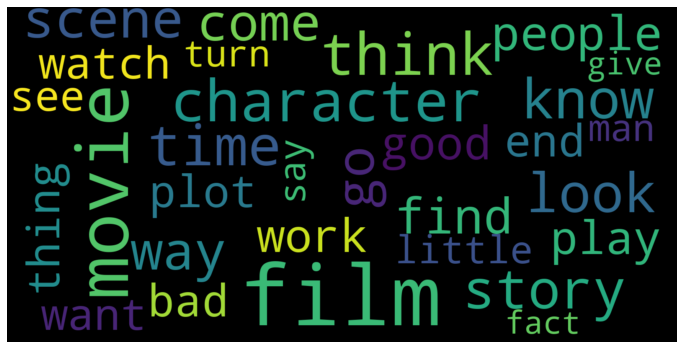

In [16]:
neg_commentary = data[data['sentiment'] == 0]
neg_string = []
for review in neg_commentary['cleaned']:
    neg_string.append(review)
neg_string = pd.Series(neg_string).str.cat(sep=' ')



wordcloud = WordCloud(width=1600, height=800,max_font_size=200, max_words=30).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

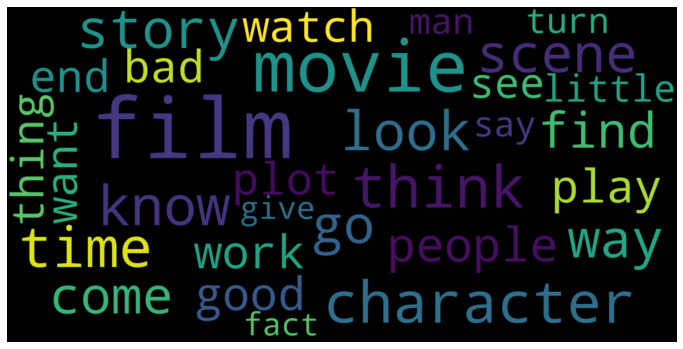

In [17]:
pos_commentary = data[data['sentiment'] == 1]
neg_string = []
for review in neg_commentary['cleaned']:
    neg_string.append(review)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, max_words=30).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()